#### Мажник Павел, 792

### ДЗ 1. Свойства оценок.
#### Задача 2. 
Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального
распределения с параметром $\theta = 1$ для $N = 10^4.$ Для всех
$n\leq N$ посчитайте оценку $(k!/\overline{X^k})^{1/k}$ параметра
$\theta.$ Проведите исследование, аналогичное предыдущей задаче, и
выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не
менее 10 различных значений $k$).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import factorial

Sample: [0.0365212  0.52361759 0.88757677 ... 1.04670334 0.89494234 0.53989214]


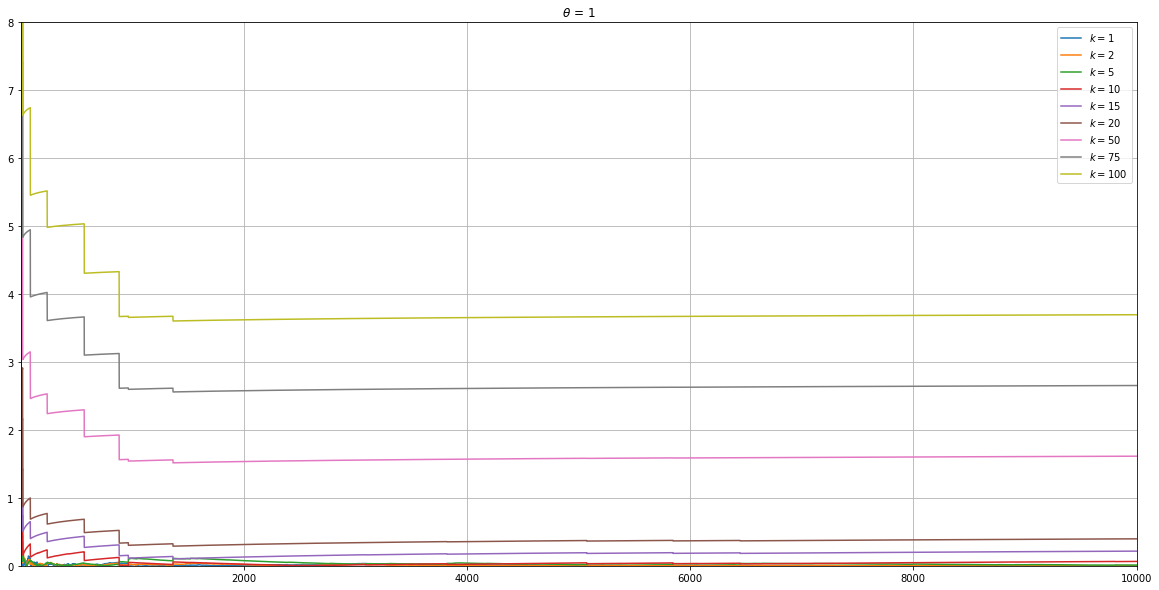

In [9]:
N = 10 ** 4
theta = 1

def estimates(ks):  # ks - массив значений параметра k
    # Сгенерируем выборку:
    sample = expon.rvs(size=N, scale=theta)
    print("Sample:", sample)
    
    # Для всех n <= N посчитаем оценки параметра theta:
    est = [np.zeros(N) for k in ks]
    for n in range(1, N + 1):
        for idx, k in enumerate(ks):
            est[idx][n - 1] = (factorial(k) / np.mean(sample[:n] ** k)) ** (1 / k)
    return est

ks = [1, 2, 5, 10, 15, 20, 50, 75, 100]
est = estimates(ks)

# Построим на одном графике
# функции модуля разности оценки и истинного значения 𝜃 в зависимости от 𝑛.
plt.figure(figsize=(20, 10))
for idx, k in enumerate(ks):
    plt.plot(np.abs(est[idx] - theta), label=r'$k = $' + str(k))
plt.title(r'$\theta$ = ' + str(theta))
plt.xlim((1, N))
plt.ylim((0, 8))
plt.legend()
plt.grid()
plt.show()

Из графика видно, что при $k \geqslant 15$ оценки сильно отличаются от инстинного $\theta .$  
Поэтому построим графики для $k \in [1, 10] .$

Sample: [1.28475672 2.27640872 0.41677933 ... 0.8215505  1.09699813 3.82406861]


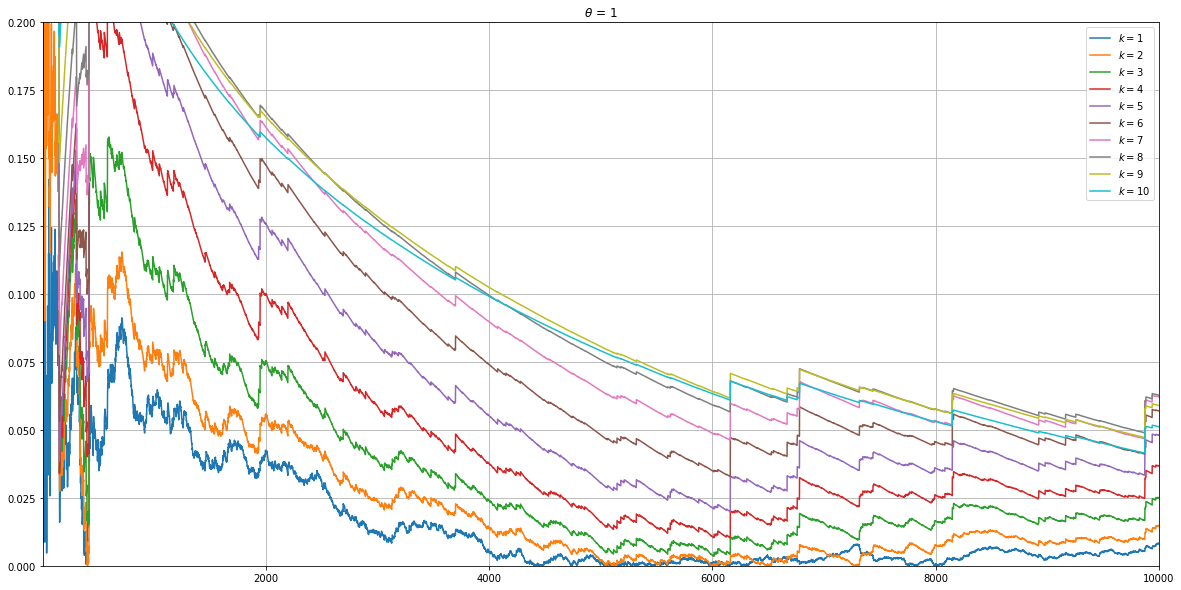

In [13]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
est = estimates(ks)

plt.figure(figsize=(20, 10))
for idx, k in enumerate(ks):
    plt.plot(np.abs(est[idx] - theta), label=r'$k = $' + str(k))
plt.title(r'$\theta$ = ' + str(theta))
plt.xlim((1, N))
plt.ylim((0, 0.2))
plt.legend()
plt.grid()
plt.show()

Увеличим масштаб.

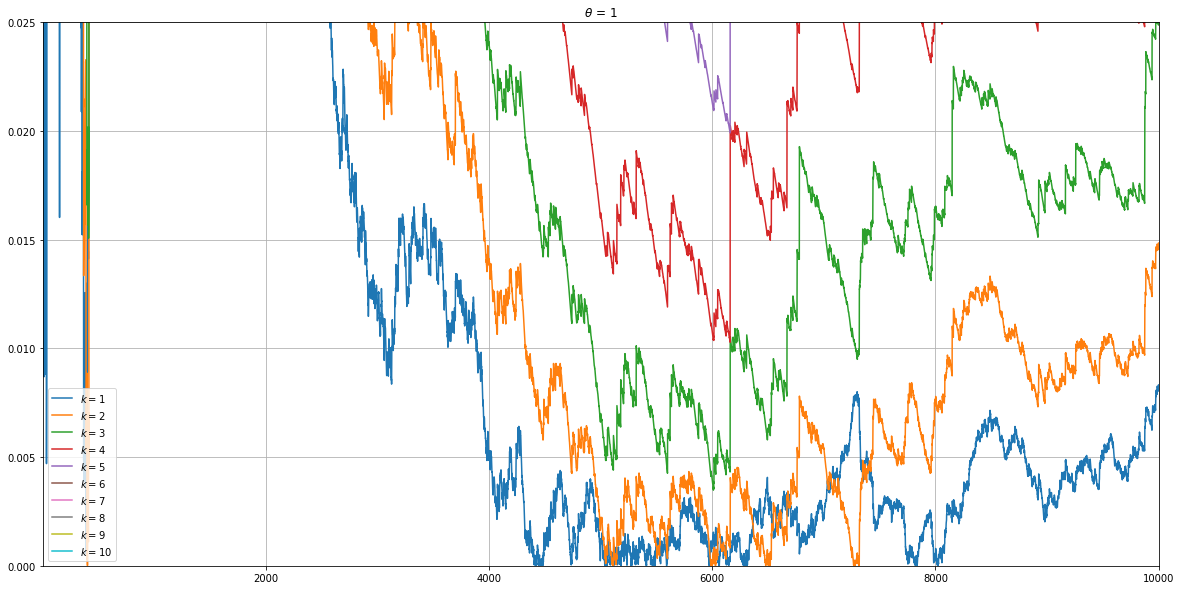

In [15]:
plt.figure(figsize=(20, 10))
for idx, k in enumerate(ks):
    plt.plot(np.abs(est[idx] - theta), label=r'$k = $' + str(k))
plt.title(r'$\theta$ = ' + str(theta))
plt.xlim((1, N))
plt.ylim((0, 0.025))
plt.legend()
plt.grid()
plt.show()

Теперь построим графики для $k \in [1; 3]$ для трех различных выборок, т.к. при этих $k$ погрешность наименьшая.

Sample: [3.37403009 1.0021269  0.01627284 ... 0.36550123 0.54362455 1.16367165]


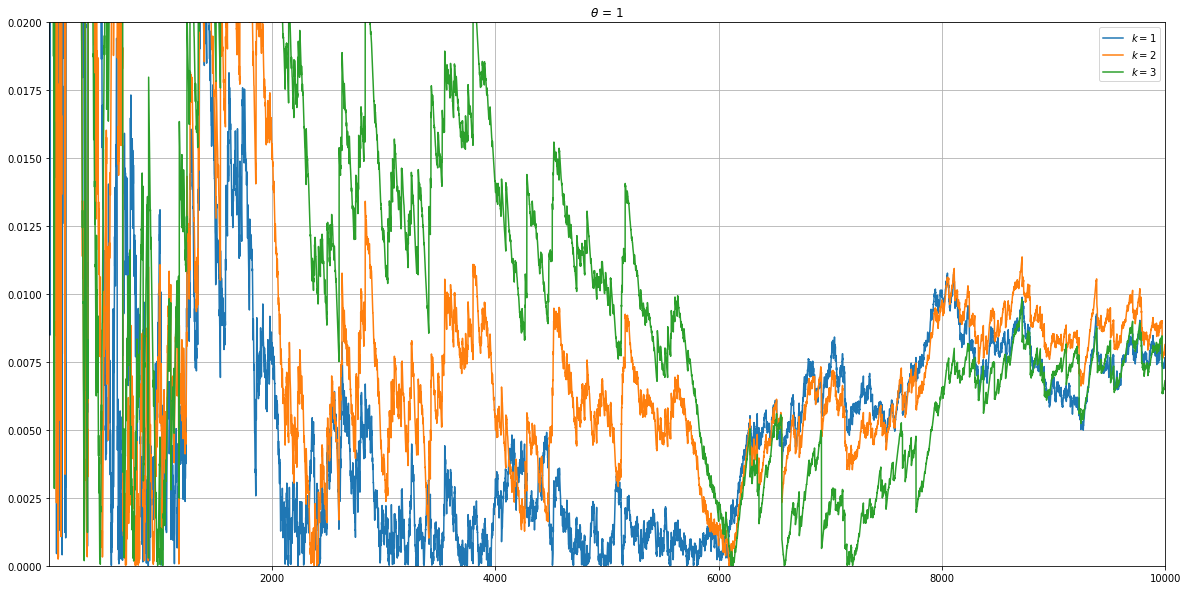

Sample: [0.79434858 0.34996985 0.76586142 ... 0.27906688 0.02970585 0.20847413]


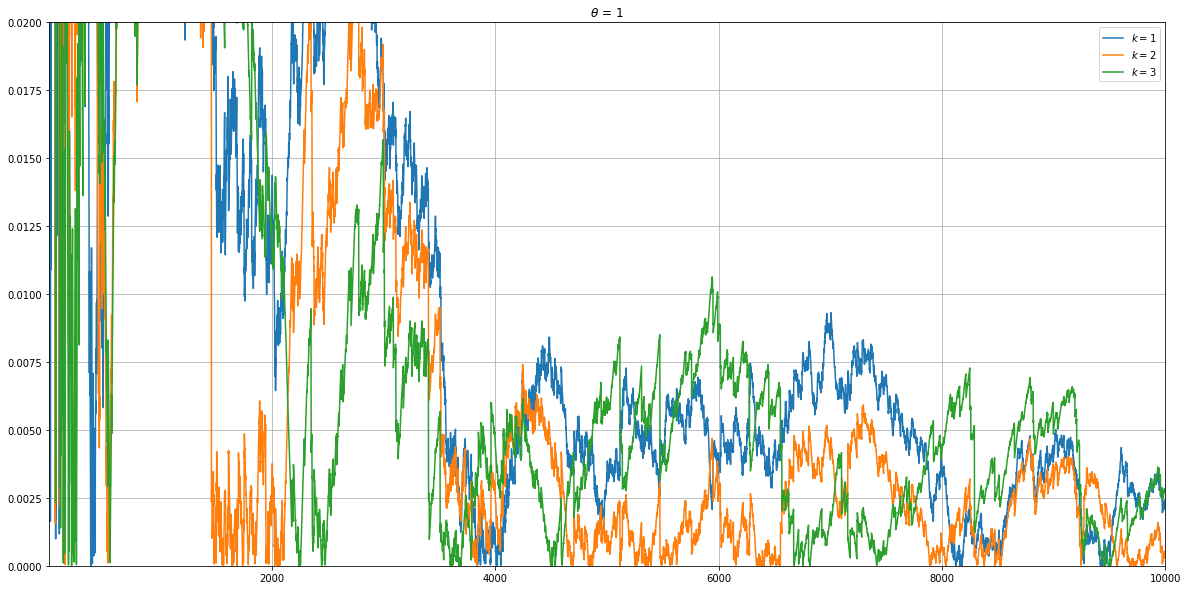

Sample: [1.15208295 3.36582442 1.36300153 ... 1.49951158 0.12218978 1.45773262]


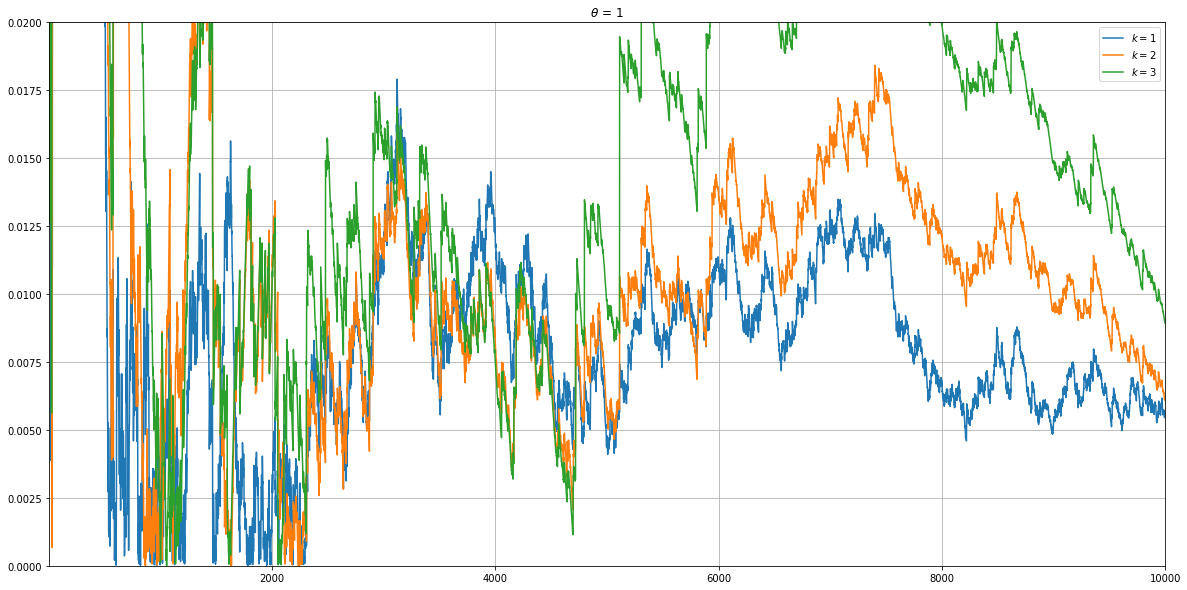

In [16]:
ks = [1, 2, 3]
for i in [1, 2, 3]:
    est = estimates(ks)

    plt.figure(figsize=(20, 10))
    for idx, k in enumerate(ks):
        plt.plot(np.abs(est[idx] - theta), label=r'$k = $' + str(k))
    plt.title(r'$\theta$ = ' + str(theta))
    plt.xlim((1, N))
    plt.ylim((0, 0.02))
    plt.legend()
    plt.grid()
    plt.show()

Из графиков сложно сделать вывод, какая оценка для $k \in [1; 3]$ является наилучшей.  
Поэтому можно сказать, что среди всех $k$ оценка $(k!/\overline{X^k})^{1/k}$ ведет себя лучше при $k = 1; 2; 3.$  
Далее с ростом $k$ увеличивается погрешность. Это связано с тем, что асимптотическая дисперсия оценки (а значит и модуль разности оценки и истинного значения) $-$ возрастающая по $k$ функция.  
Для наглядности построим график дисперсии нашей оценки от k.

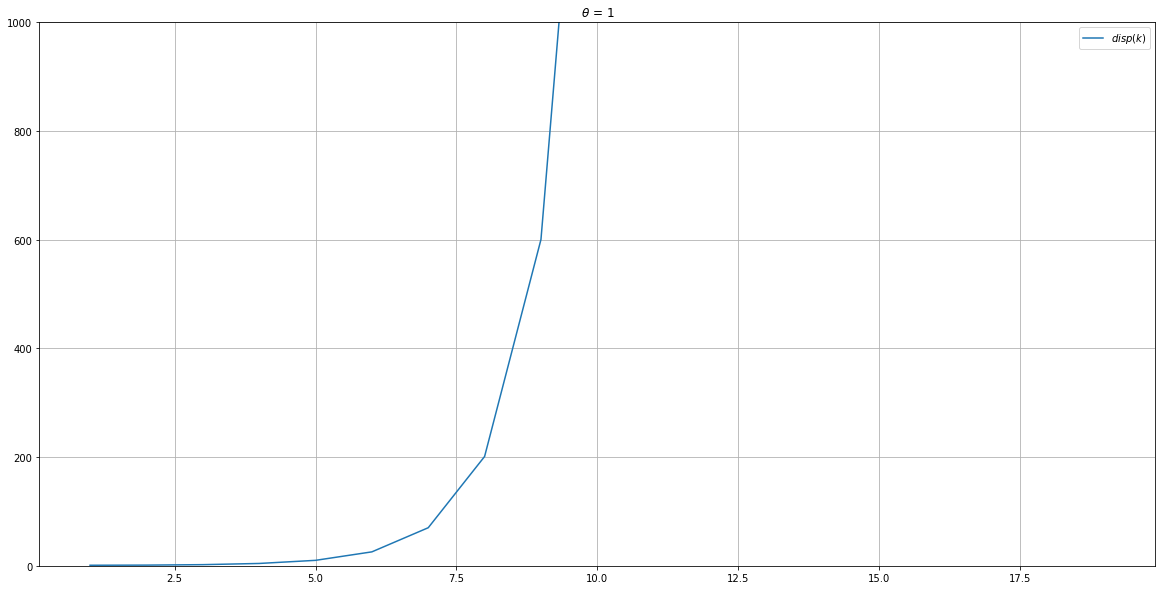

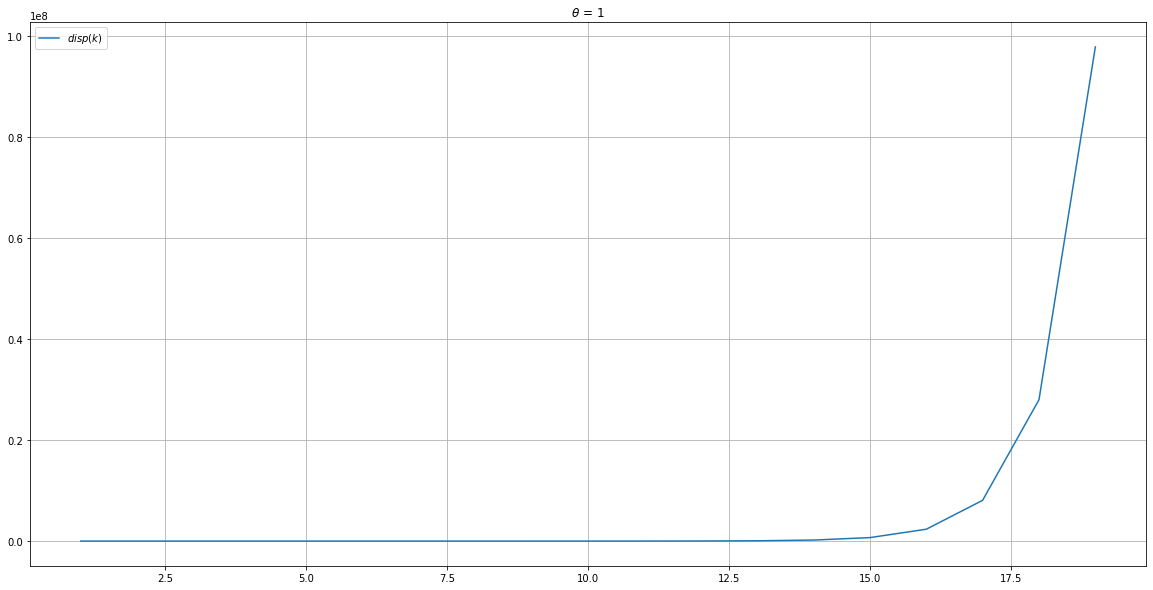

In [36]:
def disp(k):
    return (theta ** 2) * ((factorial(2 * k) / (factorial(k) ** 2)) - 1) / k ** 2
ks = range(1, 20)
disps = [disp(k) for k in ks]
plt.figure(figsize=(20, 10))
plt.plot(ks, disps, label=r'$disp(k)$')
plt.title(r'$\theta$ = ' + str(theta))
plt.legend()
plt.ylim((0, 1e3))
plt.grid()
plt.show()
# для большего масштаба:
plt.figure(figsize=(20, 10))
plt.plot(ks, disps, label=r'$disp(k)$')
plt.title(r'$\theta$ = ' + str(theta))
plt.legend()
plt.grid()
plt.show()

Полученная теоретическая картина совпадает с тем, что мы получили на практике $--$ наилучшая оценка получается при $k = 1; 2; 3;$ чуть хуже получаются оценки для $k \in [4; 10]$.